<div style="background-color:#262626; text-align: center;">
<img src="https://fiapfunctions.blob.core.windows.net/datasets/capa.png">
</div>

# Análise Final sobre áudios

## Rode o código abaixo, e responda as perguntas contidas nas células com o **box** amarelo.

In [1]:
!pip install youtube_dl

In [2]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
import numpy as np
import youtube_dl
from matplotlib.mlab import specgram
from skimage.feature import peak_local_max
from scipy.io import wavfile

In [3]:
!mkdir audios
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/seis.wav -o audios/seis.wav
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/simple_loop.wav -o audios/simple_loop.wav

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19306  100 19306    0     0  49502      0 --:--:-- --:--:-- --:--:-- 49629
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 99270  100 99270    0     0   211k      0 --:--:-- --:--:-- --:--:--  211k


### Obtendo informações do áudio com `ffprobe`

<div class="alert alert-warning" style="font-size: 1.5em;">
    <p>
        O que é o <b>ffprobe</b> e quais informações relevantes são possíveis extrair com ele?
    </p>
    <p>
        Com base no resultado da célula abaixo, cite <b>duas características</b> que se refiram a qualidade do áudio.
    </p>
</div>

**`RESPOSTA`**  
O **ffprobe** serve prar mostrar informações e metadados sobre um stream multimidia, informações como tipo de codec , duração por stream e quantidade de canais de audio.  
Sobre a qualidade do audio temos como informações importantes: 
- Taxa de Amostragem (sample_rate): quantidade de amostras são feitas por segundo (ou seja, medido em Hz); 
- Profundidade de bit (bits_per_sample): quantidade de bits utilizada por amostra. 


In [4]:
!ffprobe -i 'audios/seis.wav' -print_format 'json' -show_streams

ffprobe version 3.4.8-0ubuntu0.2 Copyright (c) 2007-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

# Obtém o `comprimento da matriz de áudio` e a `taxa de amostragem`

In [5]:
x, sample_rate = librosa.load('audios/simple_loop.wav')

<div class="alert alert-warning" style="font-size: 1.5em;">
    A função <b>shape</b> retorna a dimensionalidade de um determinada matriz. Explique qual a informação é retornada em relação a matriz do áudio. Lembre-se, o áudio de exemplo é <b>mono</b>:
</div>

**`RESPOSTA`**  
A matriz de audio retorna as amostras, sendo cada linha representa um canal.  
Neste caso o audio é mono, por isso temos apenas uma linha com a sequência de amostras.

In [6]:
x.shape

(49613,)

<div class="alert alert-warning" style="font-size: 1.5em;">
    Defina o que é a Taxa de amostragem:
</div>

**`RESPOSTA`**  
Sample Rate representa a quantidade de amostras feitas por segundo (medido como Hz)

In [7]:
sample_rate

22050

# Exibindo informações do `áudio`

<div class="alert alert-warning" style="font-size: 1.5em;">
    <p>Qual o nome dado para plot abaixo?</p>
    <p>Quais são as informações dispostas nos eixos <b>X</b> e <b>Y</b></p>
</div>

**`RESPOSTA`**
Segundo a documentação da librosa 0.8.0 essa função imprime o gráfico do envelope de forma de onda.  
O eixo X representa o tempo e o eixo Y representa a amplitude de onda.  

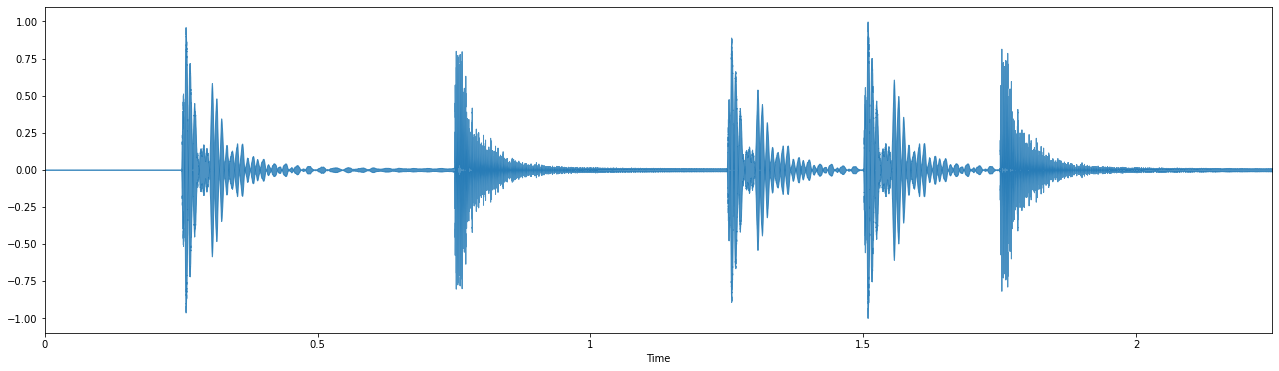

In [8]:
plt.figure(figsize=(22, 6))
librosa.display.waveplot(x, sr=sample_rate, alpha=0.8)
plt.show()

<div class="alert alert-warning" style="font-size: 1.5em;">
    Utilizando o conteúdo exposto em sala, sobre o notebook de importância da escala mel, descreva qual a diferença entre os dois plots abaixo.
</div>

**`RESPOSTA`**  
O primeiro plot foi feito usandio escal linear, enquanto o segundo gráfico foi feito em escala logaritimica.  
A escala mel melhor representa como nós humanos percebemos a escala de tons musicais, sem o uso desta escala podemos desconsiderar muitas informações úteis.   

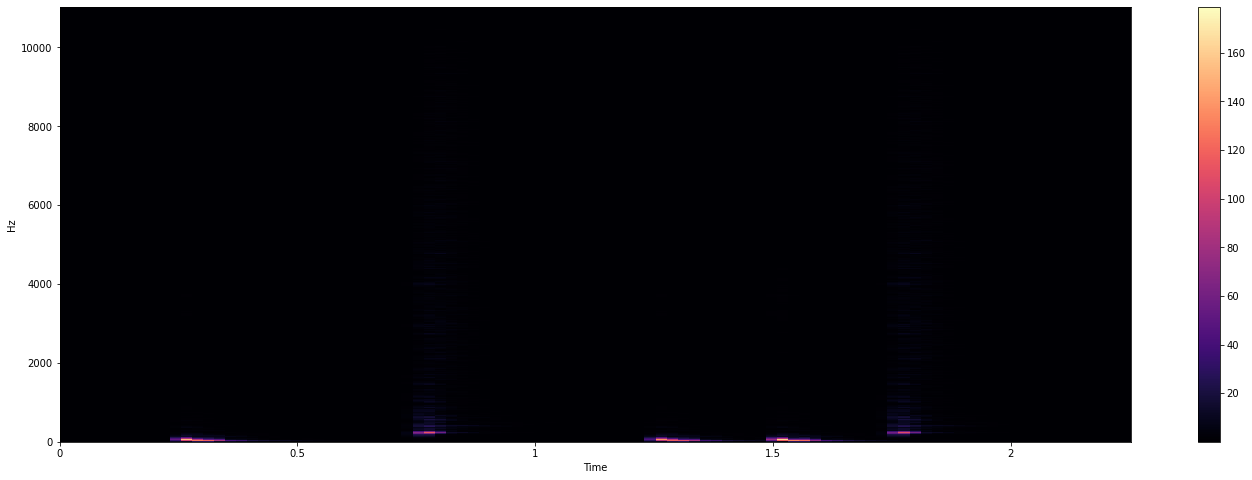

In [9]:
plt.figure(figsize=(24, 8))
hop_length = 512; n_fft = 2048
X = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))
librosa.display.specshow(X, sr=sample_rate, x_axis='time', y_axis='linear')
plt.colorbar()
plt.show()

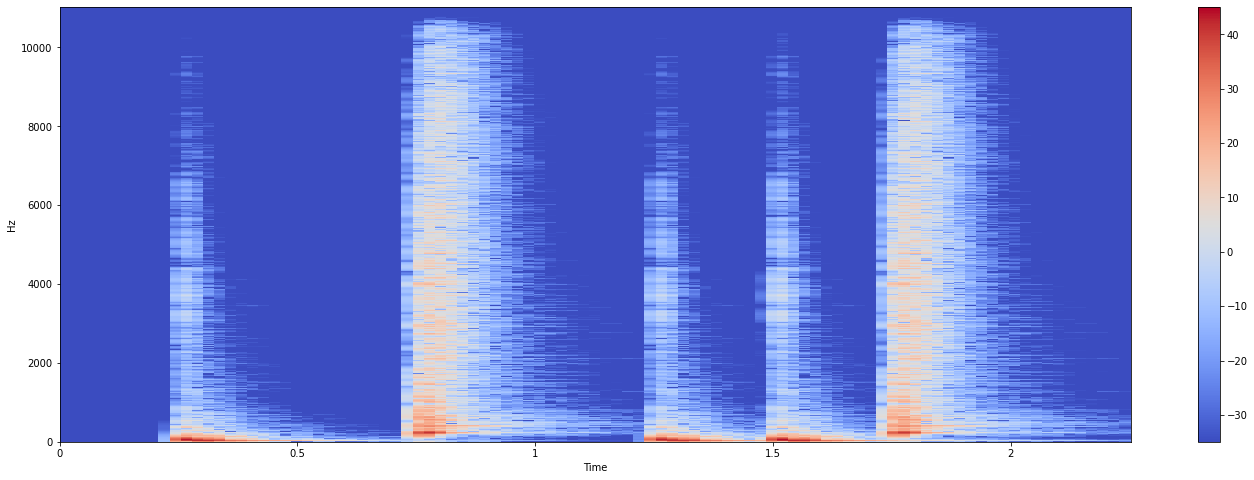

In [10]:
plt.figure(figsize=(24, 8))
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(np.abs(X))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

# Construindo um `som polifônico`

<div class="alert alert-warning" style="font-size: 1.5em;">
    <p>
        Vamos construir um som polifônico, correspondente ao acorde de DÓ maior. Siga os passos abaixo considerando a seguinte questão:
    </p>
    <p>
        Utilizando o notebook <b>02-practices</b>, encontre qual é a frequência para as notas <b>E5</b> e <b>G5</b>. Substitua os valores correspondentes na célula indica no lugar da variável <b>"FREQUENCY"</b>.
    </p>
</div>

**`RESPOSTA`**  
Segundo a tabela MIDI, as frequências são:  
E5 = 659.26 Hz   
G5 = 783.99 Hz  

In [11]:
def create_signal(freq, sr):    
    T = 2.0 # seconds    
    t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable    
    x = 0.5*np.sin(2*np.pi*freq*t) # pure sine wave at freq Hz
    return x

<div class="alert alert-warning">
    Substitua os valores aqui:
</div>

In [12]:
# sample rate
sr = 22050

c = create_signal(523,sr)
e = create_signal(659.26,sr)
g = create_signal(783.99,sr)

In [13]:
ipd.Audio(c, rate=sr)

In [14]:
ipd.Audio(e, rate=sr)

In [15]:
ipd.Audio(g, rate=sr)

In [16]:
ceg = c + e + g
ipd.Audio(ceg, rate=sr)

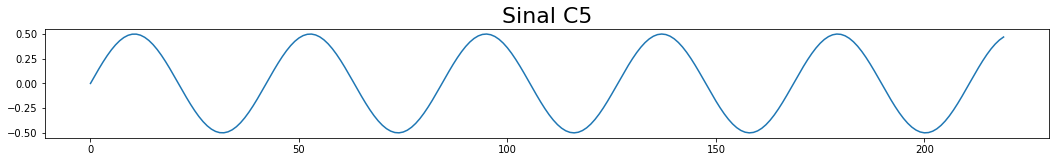

In [17]:
plt.figure(figsize=(18, 2))
plt.plot(c[:int(0.01*sr)])
plt.title('Sinal C5', fontsize = 22)
plt.show()

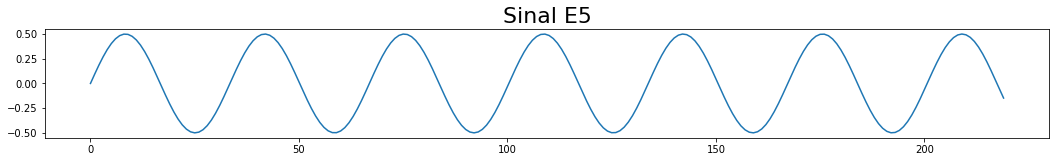

In [18]:
plt.figure(figsize=(18, 2))
plt.plot(e[:int(0.01*sr)])
plt.title('Sinal E5', fontsize = 22)
plt.show()

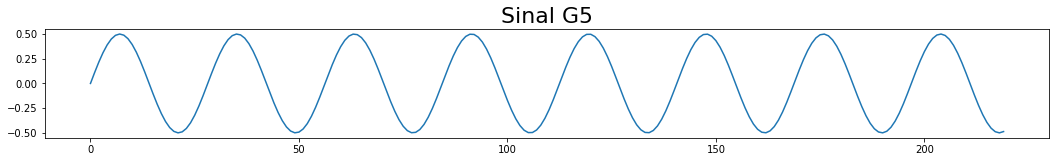

In [19]:
plt.figure(figsize=(18, 2))
plt.plot(g[:int(0.01*sr)])
plt.title('Sinal G5', fontsize = 22)
plt.show()

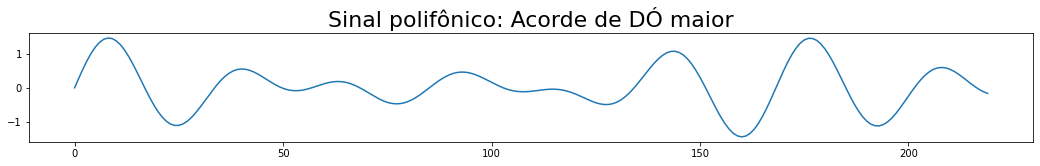

In [20]:
plt.figure(figsize=(18, 2))
plt.plot(ceg[:int(0.01*sr)])
plt.title('Sinal polifônico: Acorde de DÓ maior', fontsize = 22)
plt.show()

# `Comparando` dois áudios

<div class="alert alert-warning" style="font-size: 1.5em;">
    <p>
        Selecione duas músicas do youtube, levando em consideração que elas devem ser do mesmo gênero: Rock, Funk, ect... Se possível encontre duas versões da mesma música :)
    </p>
    <p>
        Realize o passo de download e conversão do áudio, substindo os valores necessários, como a URL do vídeo e a extensão gerada no download.
    </p>
    <p>
        Discorra brevemente sobre a comparação dos áudios, sobre o que foi visualizado e sobre o que foi utilizado abaixo.
    </p>
</div>

**`RESPOSTA`**  
Para a comparação escolhemos a musica 'We Are The Champions' do Queen, comparando a versão original contra a versão cover com Marc Martel nos vocais (conhecido pela sua semalhança vocalica com Freddy Mercury, fez parte de diversas bandas tributo ao Queen e foi vocal adicional do filme biográfico Bohemian Rhapsody de 2018).

Abaixo podemos visualizar a forma de onda dos dois audios, em seguida temos o gráfico do Espectrograma de audio (um gráfico que tenta represnetar tanto a frequência quanto a amplitude de onda sobre o tempo). Sobre o gráfico do Espectrograma foi plotado os pontos identificados como máximos locais do espectrograma, este conjunto de pontos consegue representar a música unicamente como uma *fingerprint*. 

Ao compararmos as musicas, os gráficos possuem certa similaridade (possuem regiões de alta/baixa energia em pontos próximos), mas ainda assim os pontos plotatos constiuem uma disposição completamente diferente, mostrando como o processo conseguiria diferenciar audio que para o ouvido humano parecem próximos.


In [21]:
def option_youtube(song, link):
    options = {
        'format': 'bestaudio/best',
        'extractaudio': True,
        'audioformat': 'wav',
        'outtmpl': 'audios/' + song + '.%(ext)s'}
    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([link])

In [22]:
option_youtube('audio_1', 'https://www.youtube.com/watch?v=04854XqcfCY') # We Are The Champions - Queen
option_youtube('audio_2', 'https://www.youtube.com/watch?v=XWJloWmAqnE') # We Are The Champions - Marc Martel

[youtube] 04854XqcfCY: Downloading webpage
[download] Destination: audios/audio_1.m4a
[download] 100% of 2.94MiB in 00:00
[ffmpeg] Correcting container in "audios/audio_1.m4a"
[youtube] XWJloWmAqnE: Downloading webpage
[download] Destination: audios/audio_2.webm
[download] 100% of 2.96MiB in 00:00


In [23]:
!ls audios
!mkdir audios/teste

audio_1.m4a  audio_2.webm  seis.wav  simple_loop.wav


In [24]:
!ffmpeg -i audios/audio_1.m4a -vn -ac 1 -ar 44100 -f wav audios/teste/audio_1.wav
!ffmpeg -i audios/audio_2.webm -vn -ac 1 -ar 44100 -f wav audios/teste/audio_2.wav

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [25]:
audio_1 = 'audios/teste/audio_1.wav'
x_audio_1, sr_1 = librosa.load(audio_1)

audio_2 = 'audios/teste/audio_2.wav'
x_audio_2, sr_2 = librosa.load(audio_2)

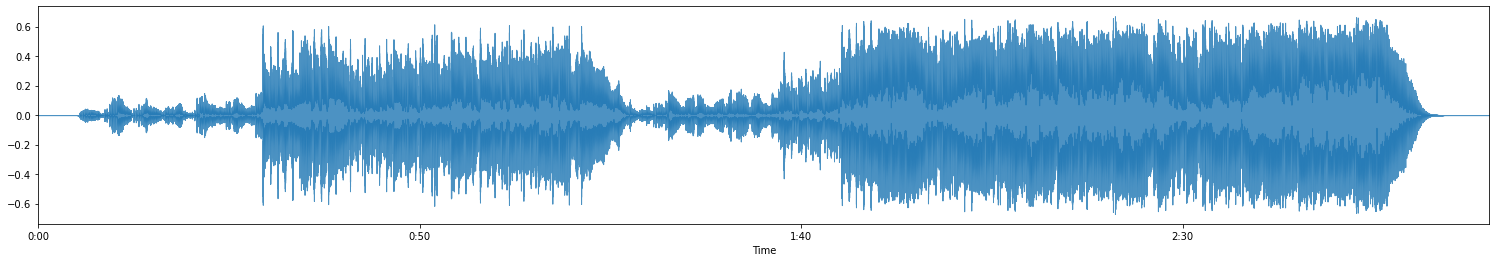

In [26]:
plt.figure(figsize=(26, 4))
librosa.display.waveplot(x_audio_1, sr_1, alpha=0.8)
plt.show()

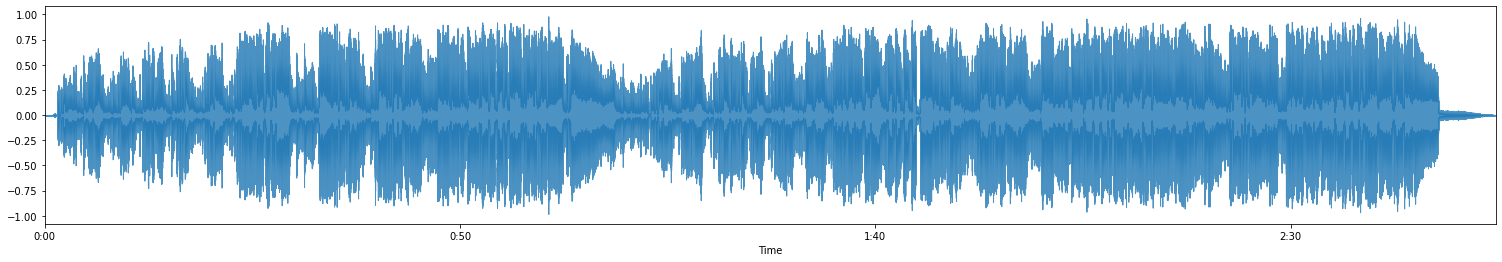

In [27]:
plt.figure(figsize=(26, 4))
librosa.display.waveplot(x_audio_2, sr_2, alpha=0.8)
plt.show()

In [28]:
rate1, song_array1 = wavfile.read('audios/teste/audio_1.wav')
rate2, song_array2 = wavfile.read('audios/teste/audio_2.wav')

spec1, freqs1, t1 = specgram(song_array1, NFFT=4096, Fs=rate1, noverlap=2048)
spec2, freqs2, t2 = specgram(song_array2, NFFT=4096, Fs=rate2, noverlap=2048)

spec1[spec1 == 0] = 1e-6
spec2[spec2 == 0] = 1e-6

def cut_specgram(min_freq, max_freq, spec, freqs):
    spec_cut = spec[(freqs >= min_freq) & (freqs <= max_freq)]
    freqs_cut = freqs[(freqs >= min_freq) & (freqs <= max_freq)]
    Z_cut = 10.0 * np.log10(spec_cut)
    Z_cut = np.flipud(Z_cut)
    return Z_cut, freqs_cut

def show_peaks(Z, freqs, t, coord, title):
    fig = plt.figure(figsize=(26, 10), facecolor='white')
    plt.imshow(Z, cmap='viridis')
    plt.scatter(coord[:, 1], coord[:, 0])
    ax = plt.gca()
    plt.xlabel('Time bin')
    plt.ylabel('Frequency')
    plt.title(title, fontsize=18)
    plt.axis('auto')
    ax.set_xlim([0, len(t)])
    ax.set_ylim([len(freqs), 0])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    plt.show()
    
min_freq = 0
max_freq = 15000

Z1, freqs1 = cut_specgram(min_freq, max_freq, spec1, freqs1)
Z2, freqs2 = cut_specgram(min_freq, max_freq, spec2, freqs2)

coordinates1 = peak_local_max(Z1, min_distance=20, threshold_abs=20)
coordinates2 = peak_local_max(Z2, min_distance=20, threshold_abs=20)

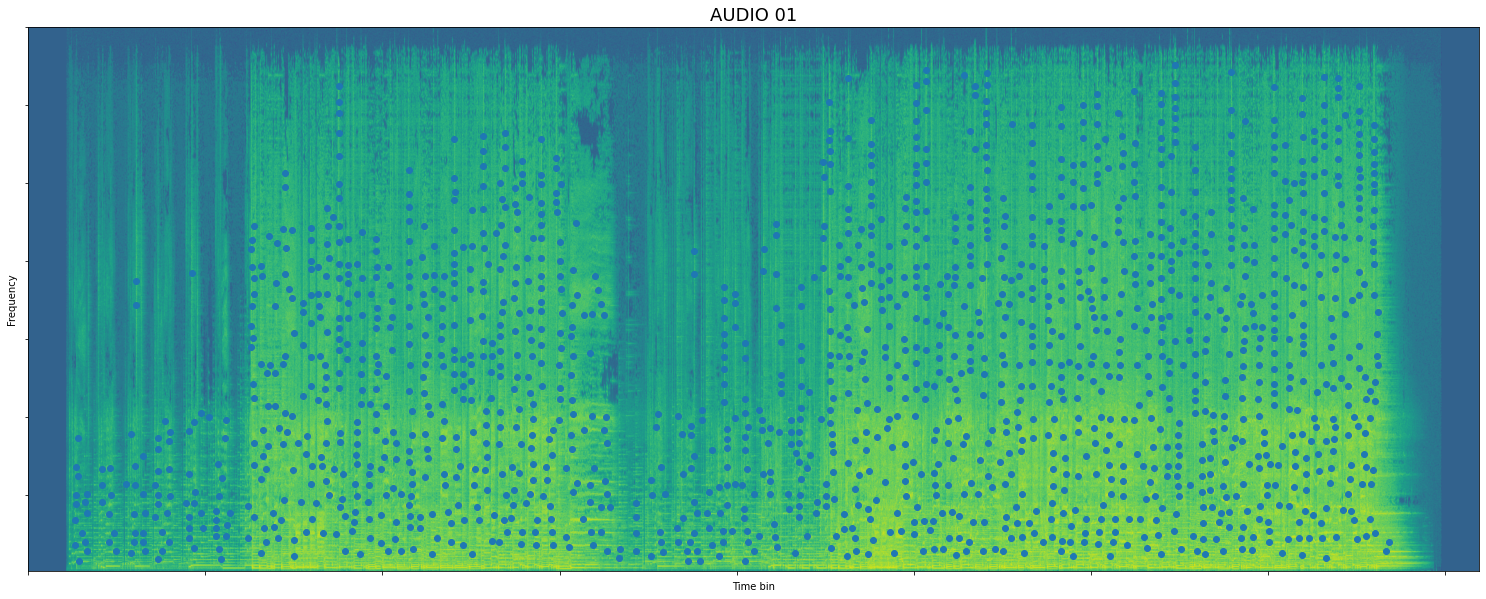

In [29]:
show_peaks(Z1, freqs1, t1, coordinates1, 'AUDIO 01')

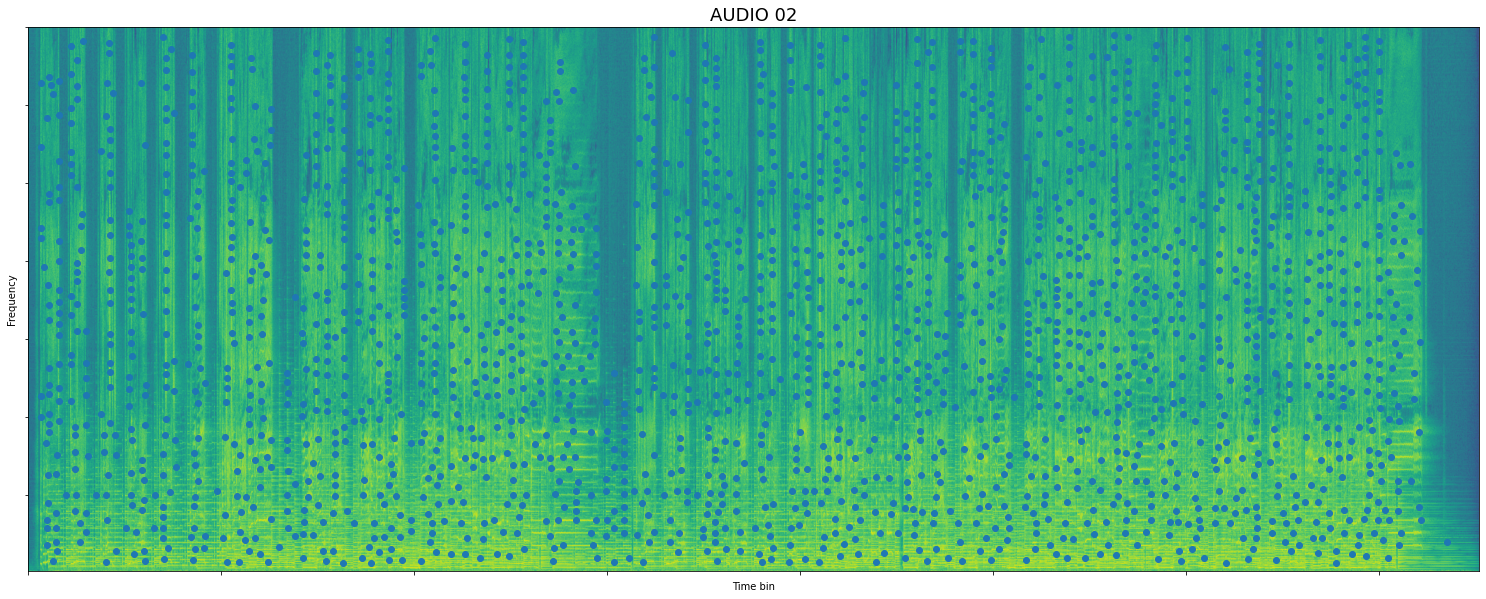

In [30]:
show_peaks(Z2, freqs2, t2, coordinates2, 'AUDIO 02')